
### Internship By: MERISKILL
##### Data Analyst: Shivam Yadav 


# Diabetes Prediction Project

## Introduction

This dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases, aiming to predict, based on diagnostic measurements, whether a patient has diabetes.

**Diabetes Overview:**
Diabetes is a chronic disease characterized by insufficient insulin production or the body's inability to use produced insulin. There are various types of diabetes, including:

- **Type 1 Diabetes (DM):** Caused by an autoimmune reaction, it can be diagnosed at any age, with symptoms developing rapidly.

- **Type 2 Diabetes (DM):** The body fails to produce or efficiently use insulin. It develops gradually over time and can be prevented by lifestyle modifications.

- **Gestational Diabetes (DM):** Develops during pregnancy, mostly after 20 weeks gestation. While it often resolves after delivery, there is an increased risk of developing diabetes later in life.

- **Impaired Glucose Tolerance:** An intermediate stage between normal and diabetes, with a high risk of progressing to type 2 DM.

Type 2 DM can lead to multiple complications, including both microvascular and macrovascular complications, resulting in reduced life expectancy, premature mortality, increased morbidity, and a significant financial burden.

## Epidemiology

According to the World Health Organization (WHO), Non-Communicable Diseases (NCDs) accounted for 74% of global deaths, with diabetes-related deaths contributing to the 9th global mortality cause.

In the United States, more than 37 million adults have diabetes, and 1 in 5 are unaware of their condition. It ranks as the 8th leading cause of death, with the number of diagnosed adults doubling in the last two decades.

In India, the estimated diabetic population was 77 million, projected to rise to over 134 million by 2045. Worryingly, more than 50% of people are unaware of their diabetes status (WHO, 2019).

**Risk Factors:**
The risk of diabetes is primarily influenced by ethnicity, age, obesity, unhealthy diet, and family history.

This project aims to predict diabetes based on diagnostic features, contributing to the broader understanding of the disease and facilitating early intervention.



## OBJECTVE:

##### To Predict whether female individuals of Pima Indian heritage, aged at least 21, have diabetes or not based on diagnostic measurements given in the dataset.

## Importing required libraries


In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier



In [2]:
# Loading the dataset
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Features of the Dataset:

1. **Pregnancies:**
   - *Description:* Number of times the patient has been pregnant.
   - *Interpretation:* This variable provides information about the patient's reproductive history and may be related to the risk of developing diabetes.

2. **Glucose:**
   - *Description:* Plasma glucose concentration in a 2-hour oral glucose tolerance test.
   - *Interpretation:* Elevated glucose levels may indicate insulin resistance or impaired glucose metabolism, which are key indicators of diabetes.

3. **Blood Pressure:**
   - *Description:* Diastolic blood pressure (mm Hg).
   - *Interpretation:* Blood pressure is a crucial health indicator, and high blood pressure is often associated with diabetes and its complications.

4. **Skin Thickness:**
   - *Description:* Triceps skinfold thickness (mm).
   - *Interpretation:* Skinfold thickness can be related to body fat percentage, and obesity is a risk factor for type 2 diabetes.

5. **Insulin:**
   - *Description:* 2-Hour serum insulin levels (mu U/ml).
   - *Interpretation:* Insulin levels are crucial in diabetes diagnosis. Low levels may indicate insulin resistance or insufficient insulin production.

6. **BMI (Body Mass Index):**
   - *Description:* Body mass index, calculated as weight in kilograms divided by the square of height in meters.
   - *Interpretation:* BMI is a measure of body fat and is closely related to obesity, which is a significant risk factor for type 2 diabetes.

7. **Diabetes Pedigree Function:**
   - *Description:* Diabetes pedigree function, providing a measure of the diabetes genetic influence.
   - *Interpretation:* Reflects the genetic component of diabetes risk, considering family history and genetic predisposition.

8. **Age:**
   - *Description:* Age of the patient in years.
   - *Interpretation:* Age is a significant risk factor for diabetes, and the likelihood of developing diabetes tends to increase with age.

9. **Outcome:**
   - *Description:* The target variable indicating whether a patient has diabetes (1) or does not have diabetes (0).
   - *Interpretation:* This is the variable you want to predict. An Outcome value of 1 indicates the person has diabetes, while 0 indicates the person does not have diabetes.

## Data Preprocessing Part 1


In [4]:
# Checking the shape of the dataset
df.shape

(768, 9)

In [5]:
# Checking for null/missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

##### 0 means no diabeted
##### 1 means patient with diabtes

In [8]:
# Checking the datatypes
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory Data Analysis
In the exploratory data analysis,I will be looking at the data and try to understand the data. I will be analyzing the data to find the relationship between the features and the target variable. I will begin with looking at the distribution of data across all the variables. Then I will look at the relationship between the features and the target variable.

#### Coorelation Matrix Heatmap


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


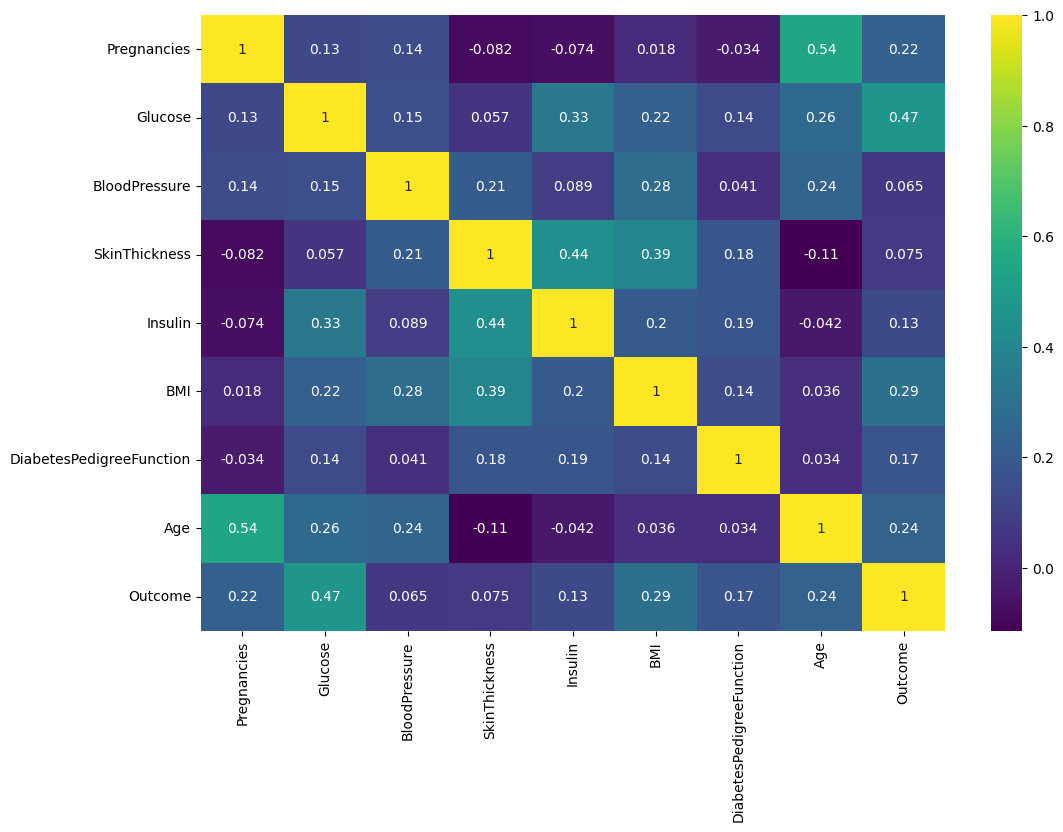

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

df.corr()

##### From the heatmap, we observe that the outcome variable has some positive relationships with glucose, BMI, age, and pregnancies. This suggests that these variables may influence the prediction of diabetes. The heatmap provides a visual representation of the correlation between different features and the outcome, helping us identify potential influential factors in predicting diabetes.


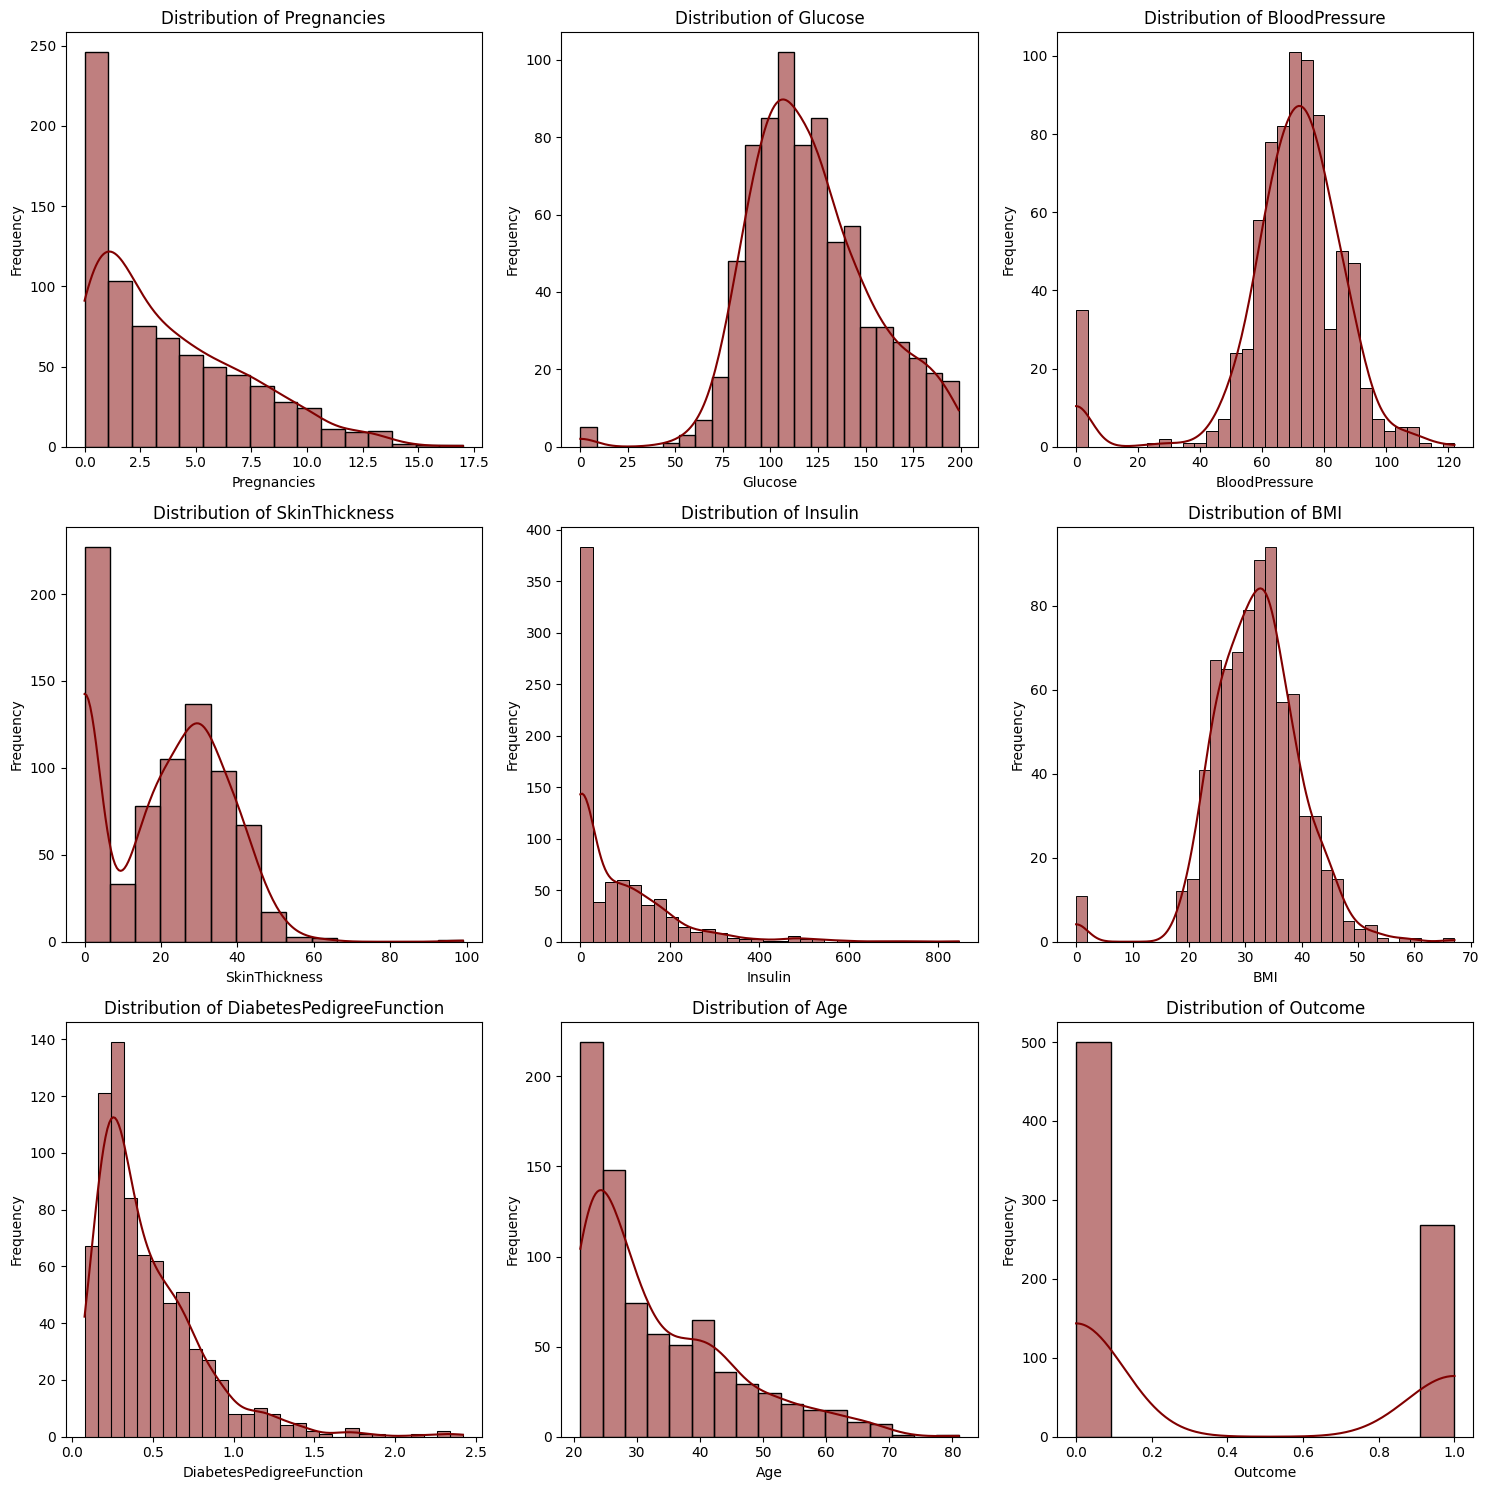

In [10]:
# Checking Histograms for Each Variable using Seaborn
plt.figure(figsize=(15, 15))

# Define the number of rows and columns for subplots
rows = 3
columns = 3

# Create subplots for each variable using Seaborn
for i, column in enumerate(df.columns, 1):
    plt.subplot(rows, columns, i)
    sns.histplot(df[column], color='maroon', kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


Our observations provide valuable insights into the distribution of key variables in the dataset. Let's summarize the main points:

1. **Age Distribution:**
   - **Description:** The age distribution in the dataset follows an approximately exponential decay pattern.
   - **Key Points:**
      - A peak around 20-25 years.
      - Decay observed around 70-80 years.
      - Represents a diverse age range of female individuals of Pima Indian heritage.
      - Right-skewed toward older ages.

2. **BMI Distribution:**
   - **Description:** The BMI distribution shows a relatively normal distribution.
   - **Key Points:**
      - Peak around 35, indicating a common BMI value.
      - Spread of BMI values, suggesting variability in body mass index.
      - Reflects diverse body mass index among individuals.

3. **Blood Pressure Distribution:**
   - **Description:** The distribution of blood pressure shows a peak around 70.
   - **Key Points:**
      - Most individuals have blood pressure values within the normal range.
      - Outliers or extreme values may need further investigation.

4. **Diabetes Pedigree Function Distribution:**
   - **Description:** The distribution of the diabetes pedigree function is right-skewed.
   - **Key Points:**
      - Majority of individuals have lower values.
      - Indicates a potential concentration of individuals with lower genetic influence on diabetes.

These observations provide a clear picture of the dataset's characteristics and will be valuable for the next steps in your analysis. Understanding the distribution of variables is crucial for feature engineering, model selection, and ensuring that your predictive model captures the nuances present in the data. If needed, you can further explore relationships between variables or handle outliers based on these insights.

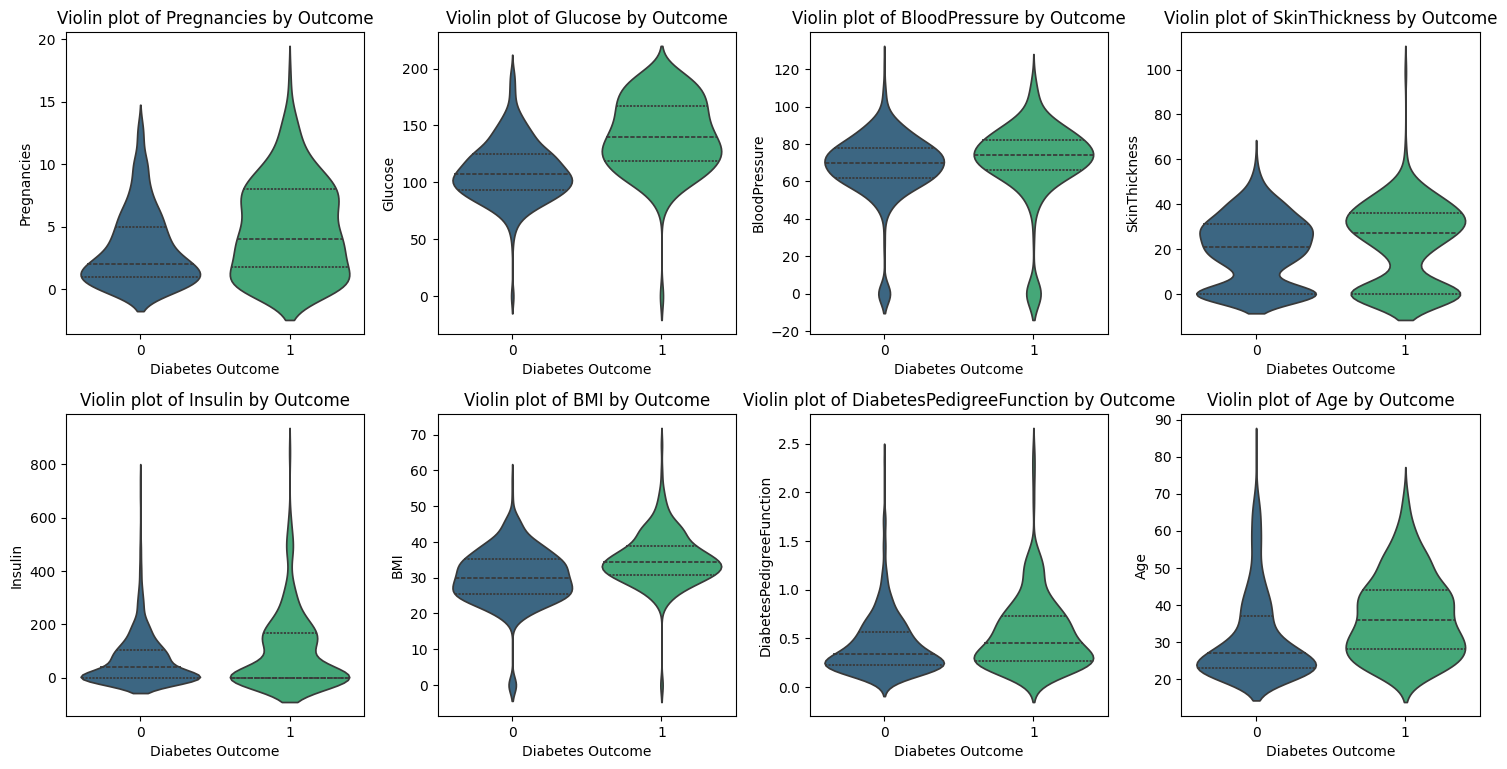

In [11]:
# Setting a larger figure size for better visualization
plt.figure(figsize=(15, 15))

# Define the number of rows and columns for subplots
rows = 4
columns = 4

# Create subplots for each variable using Seaborn boxplot
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(rows, columns, i)
    sns.violinplot(x='Outcome', y=column, data=df, hue='Outcome', palette='viridis', inner='quartile', legend=False)

    plt.title(f'Violin plot of {column} by Outcome')
    plt.xlabel('Diabetes Outcome')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()



Our analysis of the violin plots provides valuable insights into the relationship between different features and the outcome variable (diabetes). Let's summarize the key findings:

1. **Pregnancies:**
   - Individuals with diabetes (Outcome = 1) tend to have a slightly higher median number of pregnancies compared to those without diabetes (Outcome = 0).
   - The presence of diabetes is associated with a higher likelihood of having more pregnancies.

2. **Glucose:**
   - There is a clear distinction between individuals with and without diabetes in terms of glucose levels.
   - Those with diabetes have significantly higher median glucose levels.
   - Elevated glucose levels are a key diagnostic criterion for diabetes.

3. **BMI (Body Mass Index):**
   - Individuals with diabetes generally have higher median BMI values compared to those without diabetes.
   - BMI appears to be a potential differentiator, with the interquartile range (IQR) for diabetic individuals shifted towards higher values.

4. **Diabetes Pedigree Function:**
   - Individuals with diabetes have slightly higher median values for the diabetes pedigree function.
   - However, there is considerable overlap in the IQRs, suggesting that this variable alone may not be highly predictive of diabetes.

5. **Age:**
   - Individuals with diabetes tend to be slightly older, as indicated by the higher median age for the diabetic group.
   - Age alone may not be a strong predictor, and there is some overlap in the age distributions between individuals with and without diabetes.

These findings provide valuable information for feature selection and understanding the potential predictors of diabetes in your dataset. It's important to consider these insights when building and evaluating predictive models. Combining multiple features, especially those with clear distinctions, may improve the model's ability to predict diabetes. Further analysis and model building can be based on these observations.

In [12]:
print("Minimum Values in Columns:\n")

for i in df.columns:
    x=df[i].min()
    print(i,x)

Minimum Values in Columns:

Pregnancies 0
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0.0
DiabetesPedigreeFunction 0.078
Age 21
Outcome 0


In [13]:
# Counting zeros in each column
zero_counts = (df == 0).sum()

# Display the count of zeros for each column
print("Number of Zeros in Each Column:")
print(zero_counts)

Number of Zeros in Each Column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


### Here, we can observe that 0 in certain columns does not make sense in real time. So,we will chnage that 0 with average value.

#### Let's make new dataframe

In [14]:
# Create a copy of the original DataFrame
df_modified = df.copy()

# Replace zero values with the mean of non-zero values in specific columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
 
    mean_value = df_modified[column].mean()
    df_modified[column] = df_modified[column].replace(0, mean_value)

# Verify the changes
zero_counts_after_replace = (df_modified == 0).sum()

# Display the count of zeros for each column after replacement
print("Number of Zeros in Each Column (After Replacement with Mean):")
print(zero_counts_after_replace)


Number of Zeros in Each Column (After Replacement with Mean):
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [15]:
df_modified.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  

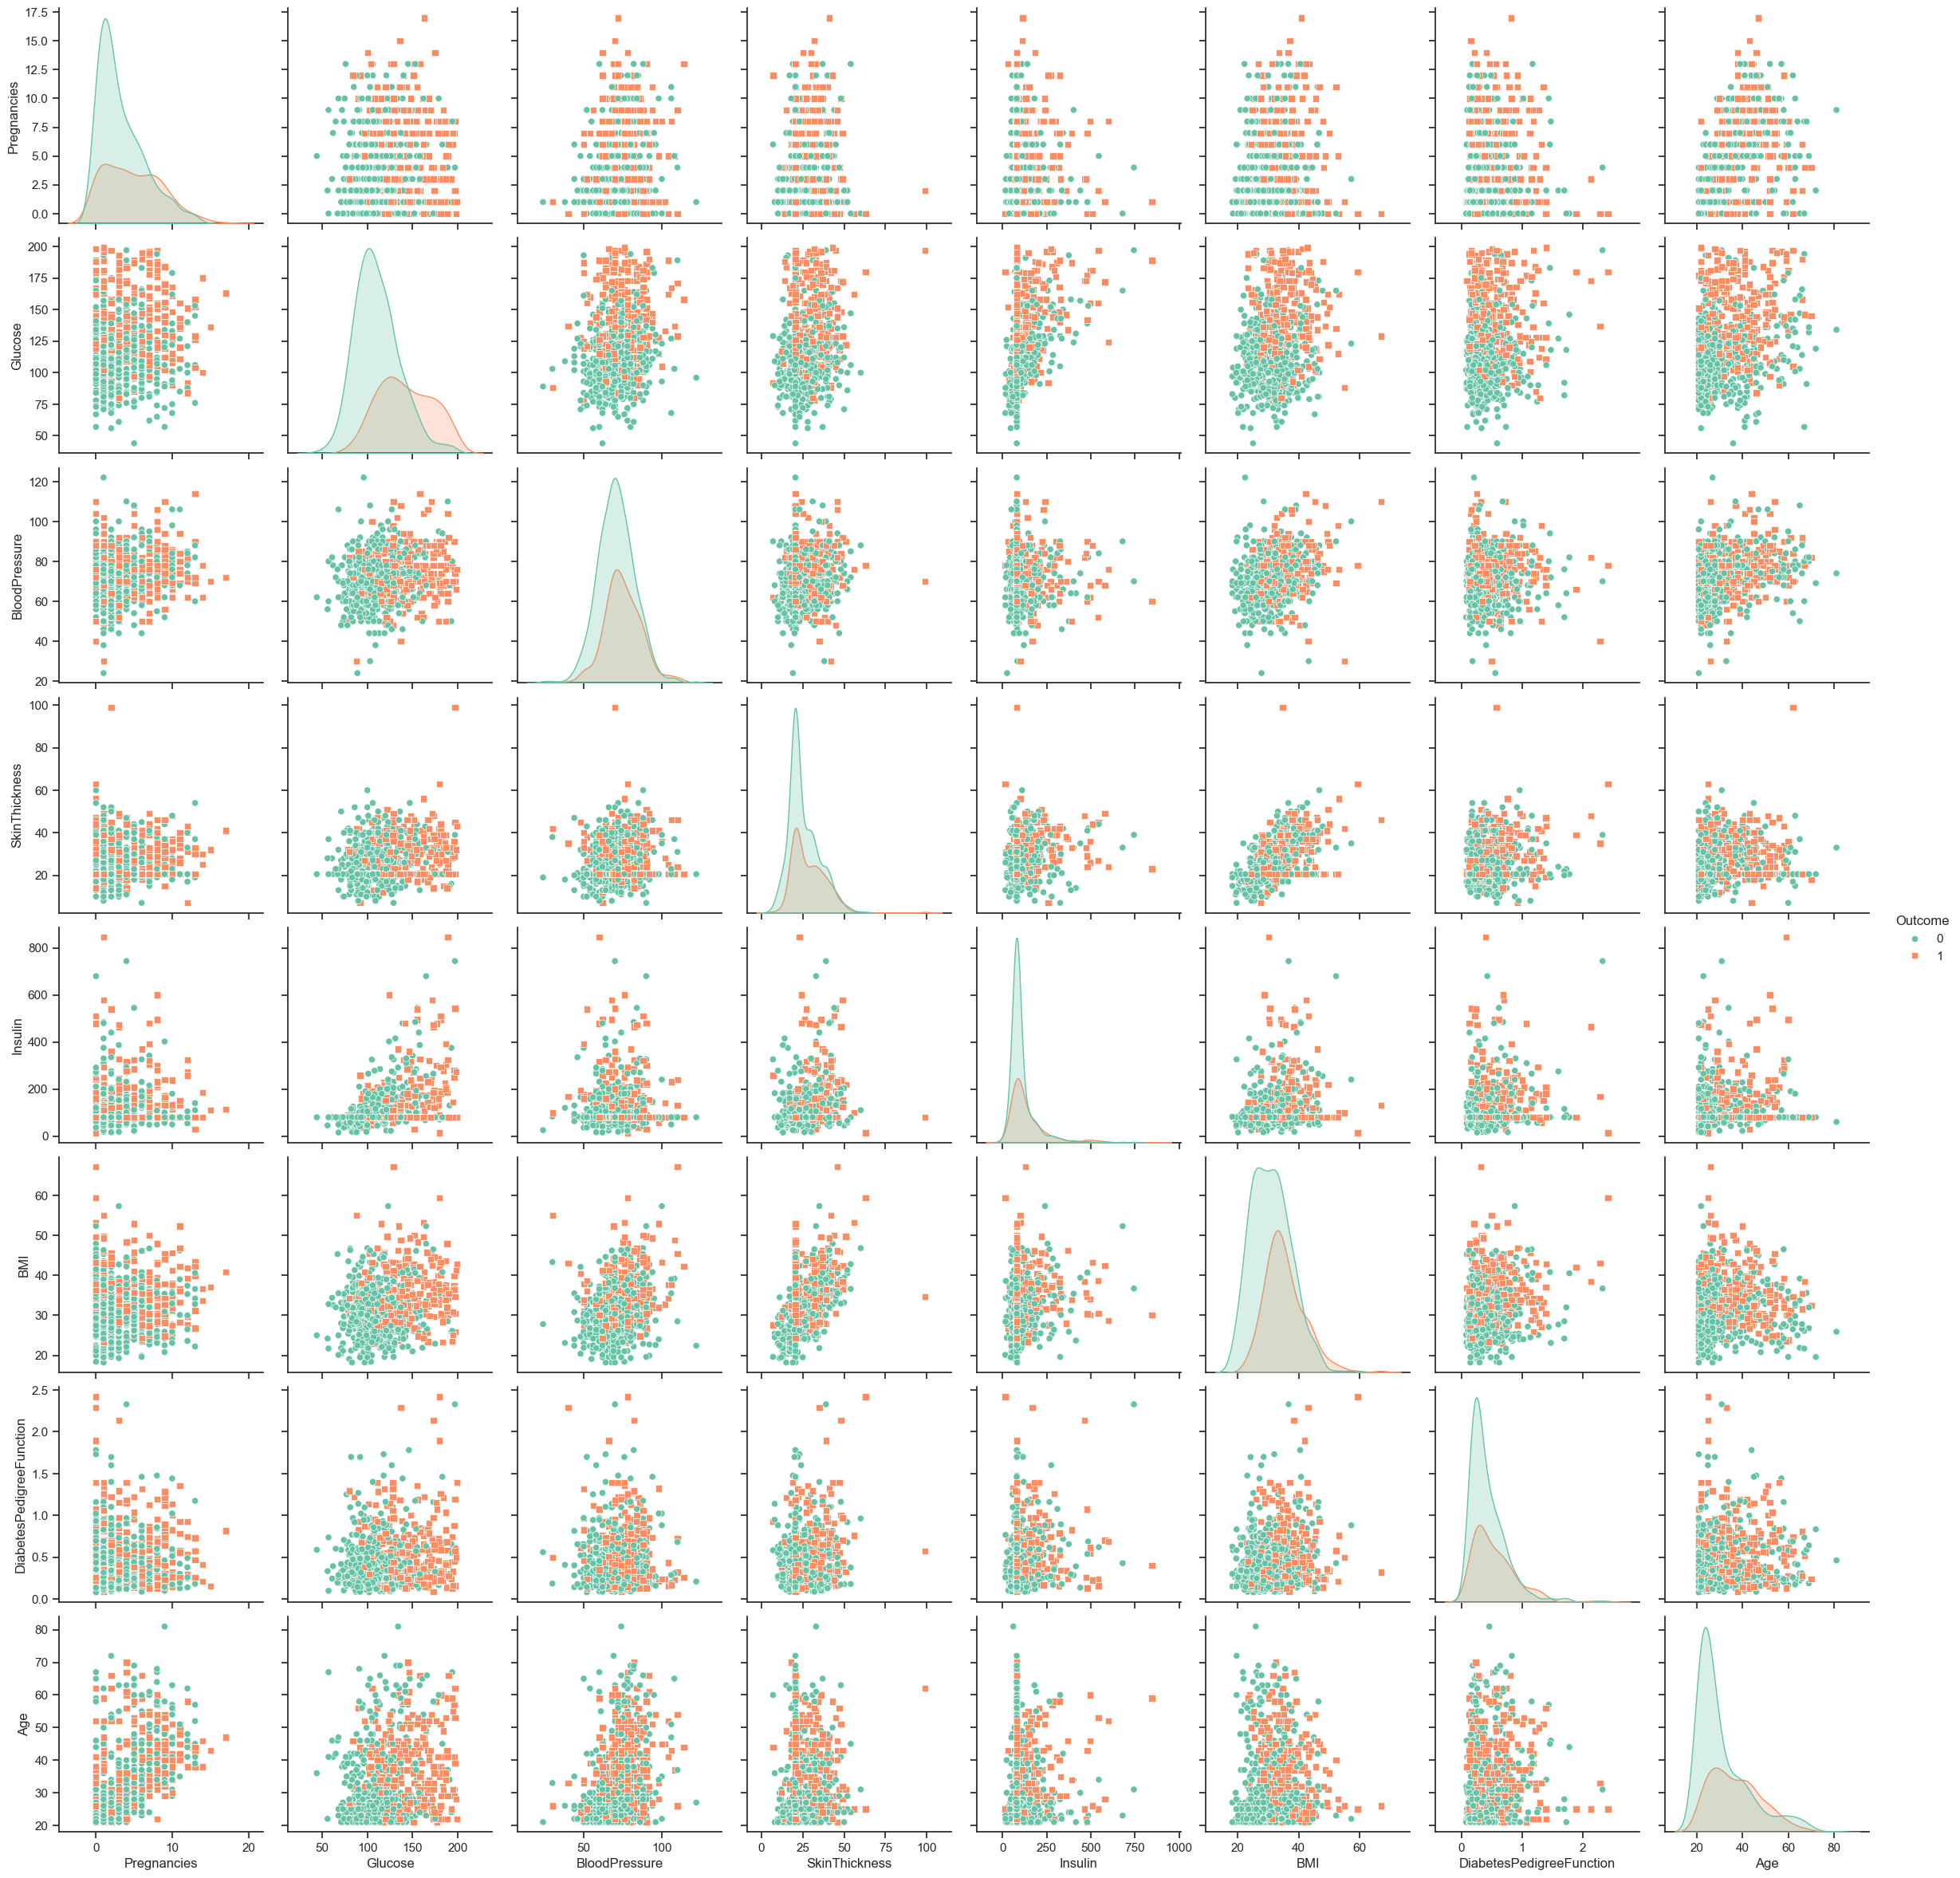

In [16]:

# Set the style of seaborn
sns.set(style="ticks")

# Create a pair plot for the entire dataset
sns.pairplot(df_modified, hue='Outcome', palette='Set2', markers=["o", "s"], diag_kind="kde", diag_kws=dict(fill=True), height=3)

# Display the plot
plt.show()


#### The pair plot shows us how different factors relate to each other in the diabetes dataset. We split the data into two groups: no diabetes (Outcome = 0) and diabetes (Outcome = 1). Looking at the scatter plots, some pairs of features, like Glucose and BMI, clearly separate the two groups. This means these features might be important in predicting diabetes.

#### In specific scatter plots, like age vs. BMI or BMI vs. blood pressure, we see certain areas where diabetes cases tend to group together. Even though there's no perfect separation between people with and without diabetes, these clusters suggest that factors like glucose, age, insulin, and BMI could influence diabetes outcomes.

#### The diagonal plots show how each individual factor is distributed. We notice differences in distributions for people with and without diabetes. This pair plot helps us start understanding which factors might be crucial in predicting diabetes.
From the kernel density plot observations:

- An increase in the number of pregnancies appears to be associated with an elevated risk of diabetes.
- When the level of Glucose exceeds 125, there is a noticeable increase in the risk of diabetes.
- Higher skin thickness seems to be linked to an increased risk of diabetes.
- The risk of diabetes tends to rise with increasing age.

These insights provide valuable initial indications of the potential influence of specific variables on the risk of diabetes, paving the way for more detailed analyses and modeling to better understand the relationships within the dataset.


#### In simpler terms, the pair plot helps us see patterns and differences in the data. It points us to factors that could play a role in whether someone has diabetes or not.


# Let's work on Machine learning model to Predict Outcome

## Using Decision Tree


In [17]:

# Separate features (X) and target variable (y)
X = df_modified.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



## Using Random Forest


In [18]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Using Logistic Regression


In [19]:
# Create a Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##  Using SVM

In [20]:
# Create an SVM model
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))


SVM Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



## Using KNN

In [21]:
# Choose the number of neighbors (you can adjust this parameter)
k_neighbors = 5

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=k_neighbors)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        99
           1       0.54      0.62      0.58        55

    accuracy                           0.68       154
   macro avg       0.65      0.66      0.66       154
weighted avg       0.69      0.68      0.68       154



# Results

In [22]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVM','Decision Tree' ,'Random Forest'],
    'Score': [lr_accuracy,knn_accuracy,svm_accuracy,dt_accuracy,rf_accuracy]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                        Model
Score                        
0.779221  Logistic Regression
0.766234                  SVM
0.766234        Random Forest
0.720779        Decision Tree
0.675325                  KNN


### Hence I will use Logistic Regression algorithm for training my model.

## Conclusion and Future Steps
#### In conclusion, this project provides a comprehensive exploration of diabetes prediction based on diagnostic measurements. The findings suggest the importance of features such as glucose, BMI, age, and pregnancies in influencing diabetes outcomes. Future steps could involve refining models, feature engineering, and incorporating additional data sources for a more nuanced prediction. This project contributes to the broader understanding of diabetes risk factors and serves as a foundation for proactive healthcare interventions.